In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from imblearn.metrics import geometric_mean_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
import warnings
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Creating the dataframes for the different datasets
df1 = pd.read_csv('jm1.csv')
df2 = pd.read_csv('mc1.csv')
df3 = pd.read_csv('pc3.csv')
# For the jm1.csv dataset after investigation the following rows should be
# removed based on the specifications given on the assignment
# When using the df1.info() we were getting object types for the following
# features, hence the convertion to numeric
df1['uniq_Op'] = pd.to_numeric(df1['uniq_Op'], errors='coerce')
df1['uniq_Opnd'] = pd.to_numeric(df1['uniq_Opnd'], errors='coerce')
df1['total_Op'] = pd.to_numeric(df1['total_Op'], errors='coerce')
df1['total_Opnd'] = pd.to_numeric(df1['total_Opnd'], errors='coerce')
df1['branchCount'] = pd.to_numeric(df1['branchCount'], errors='coerce')
df1 = df1.dropna()

# Features and labels are prepared here
X1 = df1.drop('defects',axis=1)
y1 = df1["defects"].astype(int)
X2 = df2.drop('c', axis=1)
y2 = df2["c"].astype(int)
X3 = df3.drop('c', axis=1)
y3 = df3["c"].astype(int)

In [3]:
# Dataframes
dataframes = {
     'jm1': [X1, y1]
     ,'mc1': [X2, y2]
     ,'pc3': [X3, y3]
    }

# Classifiers
classifiers = {
    'Logistic Regression': LogisticRegression()
    ,'Perceptron': Perceptron()
    ,'Decision Tree': DecisionTreeClassifier()
    ,'Random Forest': RandomForestClassifier()
    ,'SVC Linear':  LinearSVC()
    ,'SVC Rbf': SVC(kernel='rbf')
    ,'Feed Forward NN': MLPClassifier()
}

# Metrics
scorers = {
    'accuracy': make_scorer(accuracy_score)
    ,'f1_score': make_scorer(f1_score, average='weighted')
    ,'g_mean_score': make_scorer(geometric_mean_score, average='weighted')
}

# Normalization methods
normalizations = {
    'No_Normalization': None
    ,'Min_Max_Scaler': MinMaxScaler()
    ,'Standard_Scaler': StandardScaler()
}

# Dictionary to store the results
results = {}


Results for the dataset jm1


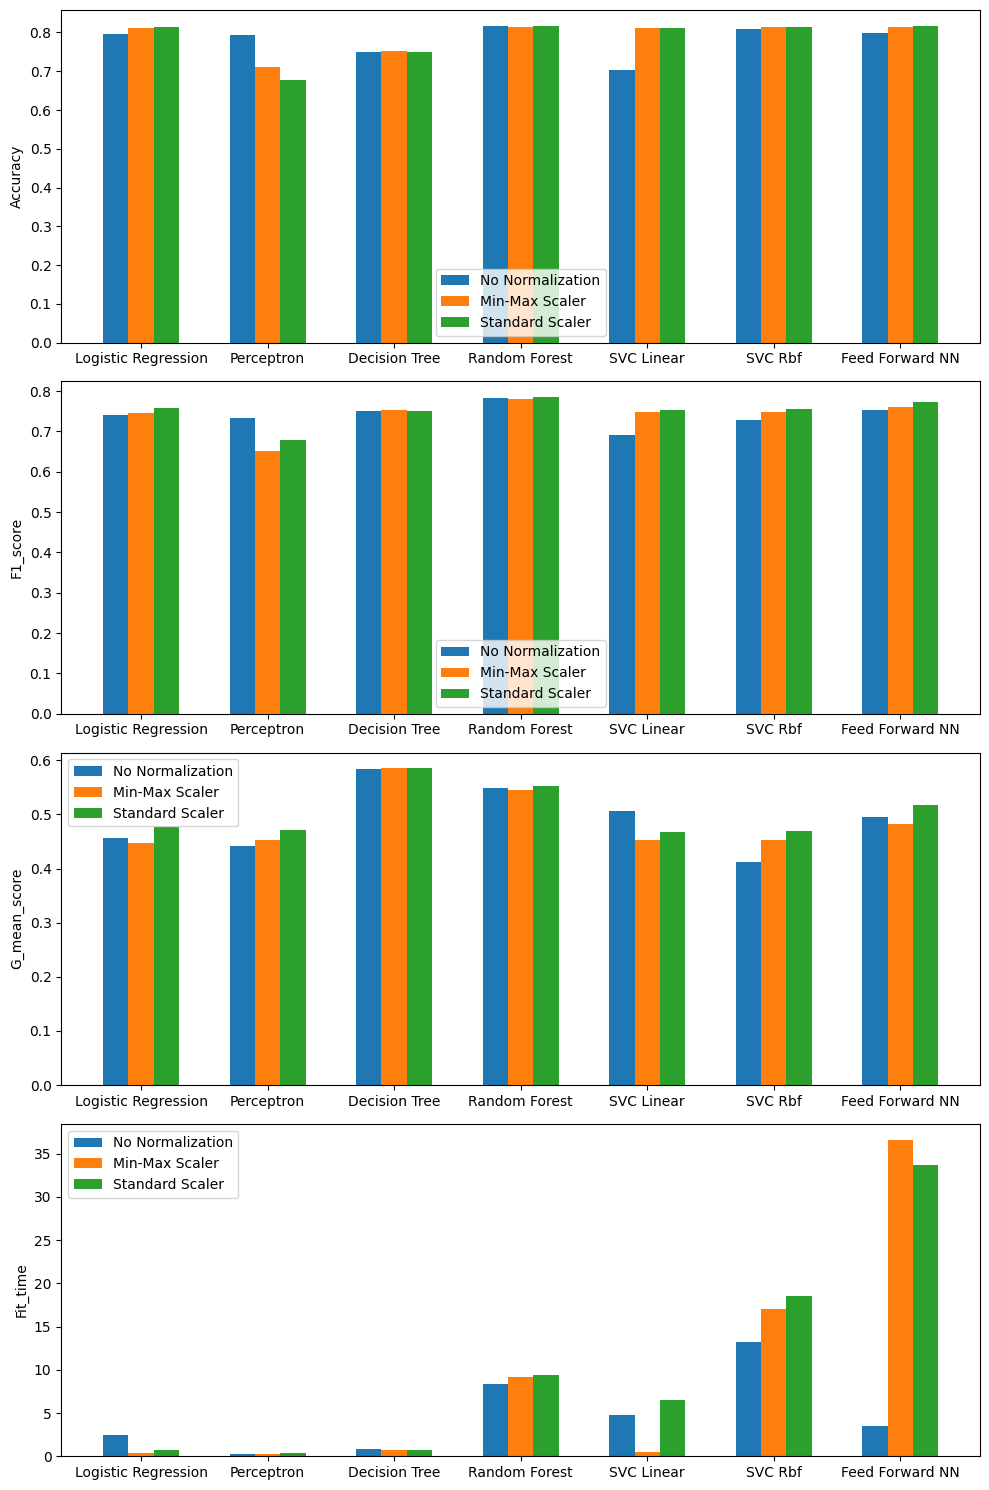


Results for the dataset mc1


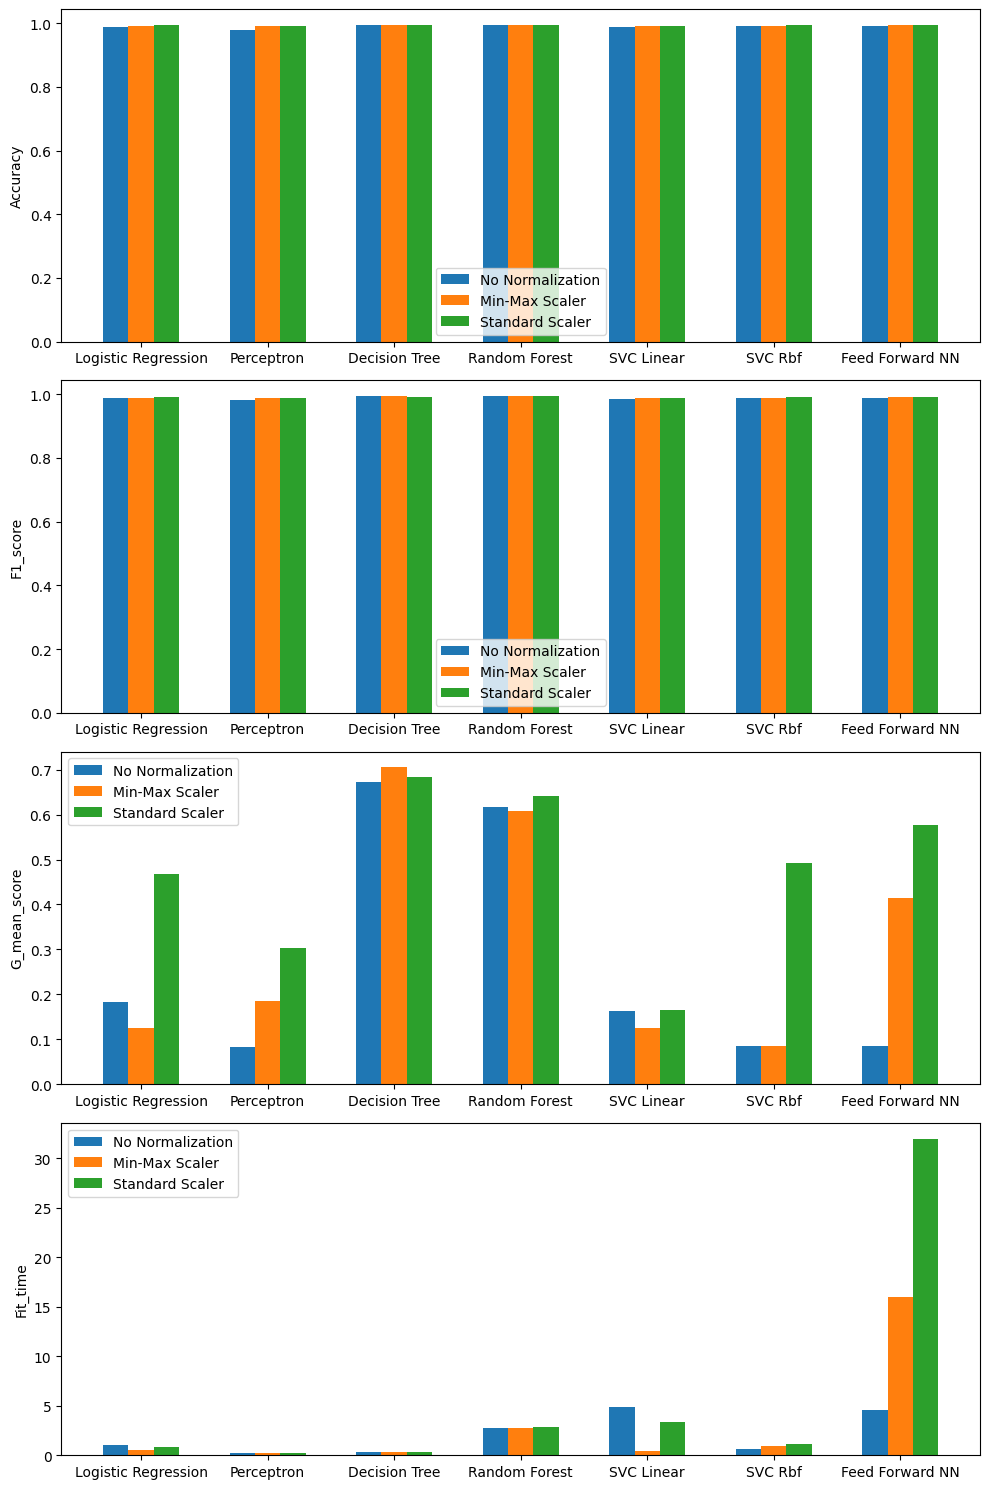


Results for the dataset pc3


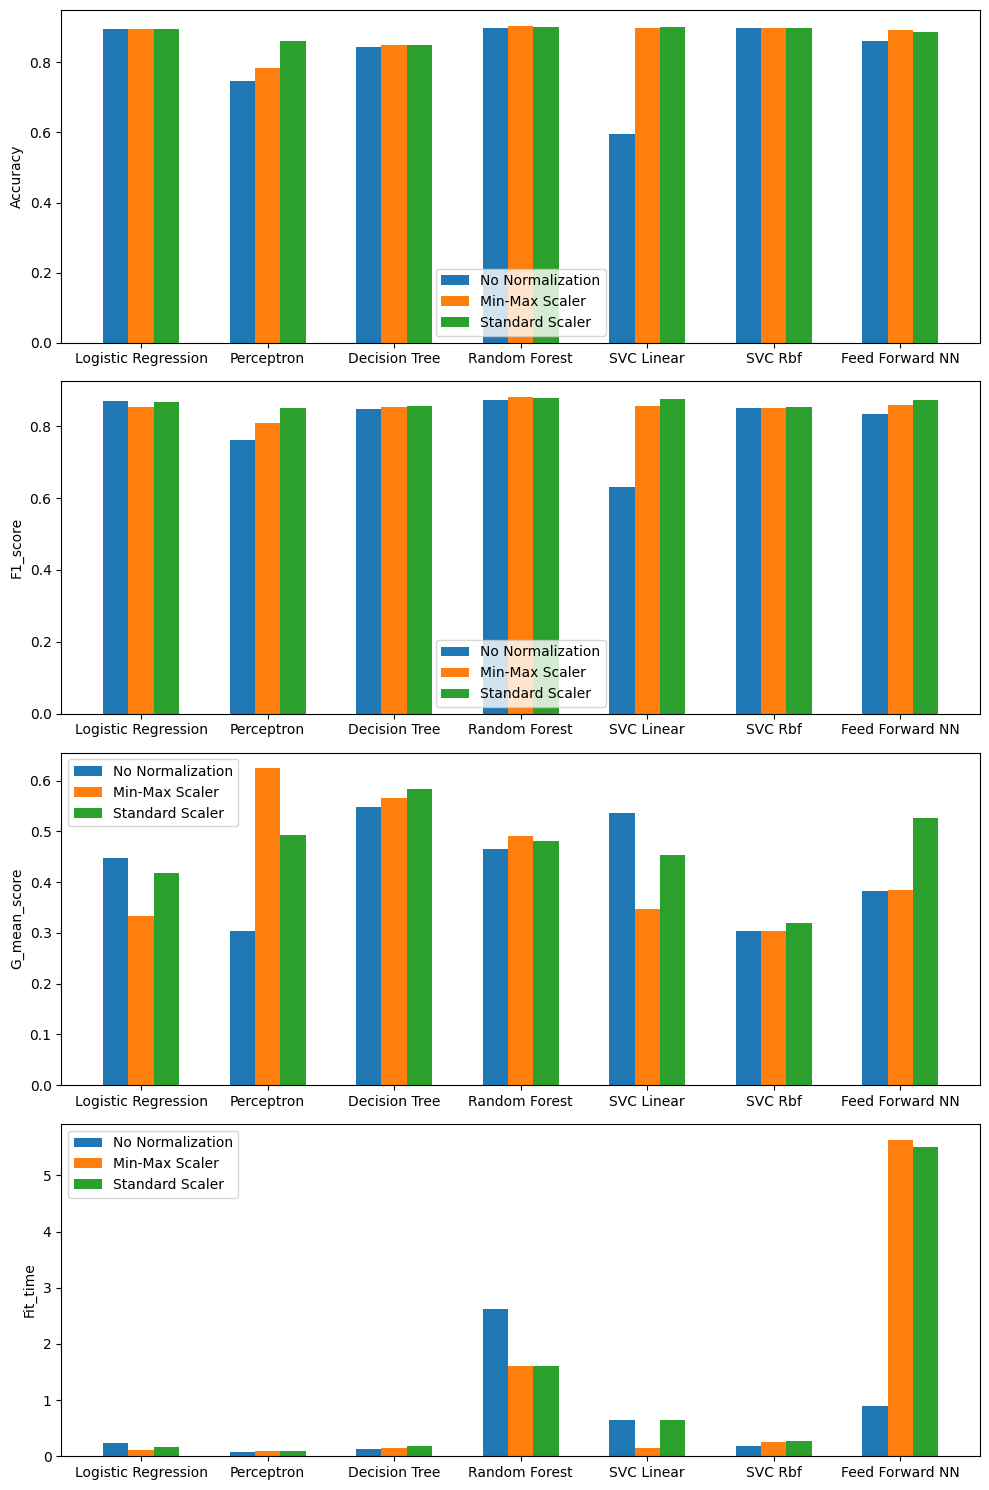

In [4]:
for key, value in dataframes.items():
  print(f"\nResults for the dataset {key}")
  # Perform cross-validation for each classifier and normalization method
  for classifier_name, classifier in classifiers.items():
      for normalization_name, normalization in normalizations.items():
          # Create a pipeline without/with a normalization method
          if normalization is None:
              pipeline = make_pipeline(classifier)
          else:
              pipeline = make_pipeline(normalization, classifier)

          # Perform Cross Validation with StratifiedKFold
          # For each dataset we define the corresponding targets and labels
          cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
          start_time = time.time()
          cv_results = cross_validate(pipeline, value[0], value[1], cv=cv, scoring=scorers, n_jobs = -1)
          fit_time = time.time() - start_time
          # Storing the results
          results_key = f'{classifier_name}_{normalization_name}'
          results[results_key] = {
              'accuracy': np.mean(cv_results['test_accuracy']),
              'f1_score': np.mean(cv_results['test_f1_score']),
              'g_mean_score': np.mean(cv_results['test_g_mean_score']),
              'fit_time': fit_time
            }
      # print(f"{classifier_name} is ready!")

  # Display the results
  # for key, values in results.items():
  #    print(f"\nResults for {key}:")
  #    print(f"Accuracy: {values['accuracy']}")
  #    print(f"F1 Score: {values['f1_score']}")
  #    print(f"G-Mean Score: {values['g_mean_score']}")
  #    print(f"Fit time: {values['fit_time']}")

  # For each normalization method we gather the results
  no_normalization_method = [results[f'{classifier}_No_Normalization'] for classifier in classifiers.keys()]
  min_max_scaler_method = [results[f'{classifier}_Min_Max_Scaler'] for classifier in classifiers.keys()]
  standard_scaler_method = [results[f'{classifier}_Standard_Scaler'] for classifier in classifiers.keys()]

  # The metrics that were used
  metrics = ['accuracy', 'f1_score', 'g_mean_score', 'fit_time']

  # Create subplots for each metric
  fig, ax = plt.subplots(nrows=len(metrics), ncols=1, figsize=(10, 15))

  # Plot bar charts for each metric
  for i, metric in enumerate(metrics):
      # Results for each normalization method
      no_norm_res = [res[metric] for res in no_normalization_method]
      min_max_res = [res[metric] for res in min_max_scaler_method]
      std_scaler_res = [res[metric] for res in standard_scaler_method]

      # Bar width
      bar_width = 0.2

      # Bar positions
      index = np.arange(len(classifiers))

      # Plot bars for each normalization method
      ax[i].bar(index - bar_width, no_norm_res, bar_width, label='No Normalization')
      ax[i].bar(index, min_max_res, bar_width, label='Min-Max Scaler')
      ax[i].bar(index + bar_width, std_scaler_res, bar_width, label='Standard Scaler')

      # Set labels and title
      ax[i].set_ylabel(metric.capitalize())
      ax[i].set_xticks(index)
      ax[i].set_xticklabels(classifiers.keys())
      ax[i].legend()

  # Adjust layout and show plots
  plt.tight_layout()
  plt.show()

 # Discussing the results for the dataset 'jm1.csv'

Firstly, regarding the values that existed inside the dataset, the non numeric values were converted to numeric ones and then those that were NaN were removed as suggested. Moreover, the default values for each classifier were used. By the size and contents of this dataset we noticed that it is less imbalanced than the other two.
>
Through analysing the resulting data we can see that the Decision Tree, Random Forest, the SVC (with linear kernel) and Feed Forward Neural Network show a better overall perfomance across the different normalization methods, with the Random Forest performing better than the rest. However, the Random Forest has a longer fit time.
The Decision Tree classifier does not seem to be affected that much across the different normalization methods. The same goes with the Random Forest classifier as well.
Normalization helps with optimizing the performance of the SVC (with rbf kernel) and the Logistic Regression.
Normalization shows an improved perfomance for the majority of the classifiers.
>
More specifically, the Logistic Regression and the Perceptron displayed reasonable accuracy and f1 score but a lower g-mean without normalization. The Min-Max Scaler improved the accuracy and f1 score for the Logistic Regression but caused a decrease in those metrics for the Perceptron. Standard Scaler further improved those metrics for the Logistic Regression but decreased them for the Perceptron. Decision Tree classifier displayed pretty much consistent performance regarding the accuracy, f1 and g-mean regardless the normalization. As far as the Random Forest classifier is conserned, the metrics were higher and seemed to improve after normalization, with the Standard Scaler displaying the best improvement. Regarding the SVC algorithms (both linear and rbf kernel), they displayed moderate accuracy and the normalization methods improved their performance except for the Min-Max Scaler that decreased slightly the g mean for the linear kernel. Lastly, the Feed Forward Neural Network was affected a lot by the normalization techniques with the Standard Scaler increasing the algorithm's scores the most. Regarding the fit times, the Feed Forward Neural Network demonstrates the higher score (especially when comparing the results without normalization with those that a normalization technique was applied) and is followed by the SVC (with rbf kernel) and the Random Forest classifiers. Interestingly, the SVC (with linear kernel) shows a shorter fit time when Min-Max Scaler is applied.




# Discussing the results for the dataset 'mc1.csv'

By analysing the results for this particular dataset we can see clearly that Decision Tree and Random Forest perform better than the rest of the classifiers.
>
Standard Scaler demonstrates better performance amongst the three normalization methods for the Logistic Regression and the Perceptron classifiers. Perceptron however shows poor scores compared to the Logistic Regression. The Decision Tree classifier shows the best overall performance, especially without normalization and after Min-Max Scaler is applied. We can see that by applying the Standard Scaler here the g mean score drops slightly. Quite similar results we get for the Random Forest classifier as well, with the Min-Max Scaler improving the g mean score of this implementation. As far as the SVC classifiers are concerned we can see a better performance of the SVC with the rbf kernel after the Standard Scaler method is applied. Lastly, the Feed Forward Neural Network comes shows a better performance than the Logistic Regression, Perceptron and the SVC classifiers after the Standard Scaler is applied. The fit times that were calculated show that the Feed Forward Neural Network takes the most time for it to be trained and the SVC (with linear kernel) as well as the Random Forest follow with lower scores. One interesting observation that needs to be pointed out is that with the Min-Max Scaler it takes much less time for the training of the SVC (with the linear kernel), while the Standard Scaler increases a lot the fit time of the Feed Forward Neural Network.   


# Discussing the results for the dataset 'pc3.csv'

The resulting scores demonstrated above, show that Logistic Regression and Random Forest have comparable accuracies and the same goes with the SVC and Feed Forward Neural Network which seem to perform at the same level of the first two, as far as the accuracy metric is concerned, when normalization is applied. The aforementioned classifiers have higher accuracies than the rest. More specifically, when a normalization method is applied we can see the SVC with the linear kernel scoring higher values for its accuracy, while for the SVC with the rbf kernel normalization does not seem to affect its accuracy. As far as the f1 scores are concerned, the normalization methods demonstrate crucial effectiveness for the Perceptron, the SVC (with linear kernel) and the Feed Forward Neural Network. Interestingly, the Standard Scaler seems to increase the most the f1 score amongst the three approaches for the later classifiers. Having said that the f1 scores are comparable amongst the other classifiers when it comes to which normalization technique one should choose. Now, for the g mean scores that were captured, we can tell just by looking at the plot that each classifier and each normalization method plays an important role. The Perceptron classifier shows the the best overall g mean score, while Decision Tree, Random Forest and SVC (with rbf kernel) show reobustness regardless the normalization method. More specifically, Logistic Regression performs better when no normalization is applied and this can be backed up by the fact that the Min-Max Scaler drops significantly its g mean score. Perceptron on the other hand has a better g mean score when the Min-Max Scaler is applied and poorer when Standard Scaler is applied. The Min-Max method does not seem to help increase the g mean score of neither the SVC (with linear kernel) nor the Feed Forward Neural Network, since for the SVC (with linear kernel) no normalization is considered better while for the Feed Forward Neural Network the Standard Scaler does a better job. Lastly, the Feed Forward Neural Network displays the longest fit time in general with the Random Forest classifier following up next.